<h1> <center> CLASSIFICATION OF SYMBOLS USING DEEP LEARNING

____

<h2> OBJECTIVE

> To write a Python Code that is capable to load all the symbol datasets to perform a classification evaluation/validation with atleast three classifiers: 
- **Artificial Neural Network** (ANN)
- **Convolutional Neural Network** (CNN)
- **Any Supervised Learning classifier** (eg. Random Forest)

<h3> DATA AVAILABILITY

A collection of **`2432 images`** of symbols from a class of complex engineering drawings. These symbols are split into **`39 classes`**. The image repository is composed of 39 folders, each containing a certain amount of symbol images that have been collected for each of these for each of the classes.  The dataset has a high degree of imbalance as well.

![](Symbols_sample.jpg)

<h3> PROJECT REQUIREMENT

To code a Python script that is able to go through the image dataset and load the images into a python data structure (numpy array or pandas data frame) along with its corresponding label/target/class. Consider if the symbols should be binarized/resized or processed in any other way, before creating the selected data structure.
Implement atleast one feature extraction, one image/data augmentation and one class decomposition technique to create a minimum of 3 additional data structures. 

___

<h4> INSTALLING REQUIRED LIBRARIES

*If you are having problem in installing any of the above libraries, you can always check out the this link: https://bit.ly/3bdYXWt*

<h3> IMPORTING REQUIRED LIBRARIES

In [36]:
# Temporary files and directories 
import os

# Linear Algebra
import numpy as np

# Data processing
import pandas as pd 

# Random Module
import random

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Image Processing
from skimage import io
from skimage import data
from skimage import transform
from skimage.color import rgb2gray

# Neural networks
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

# Preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

# warnings
import warnings
warnings.filterwarnings('ignore')

<h2> LOAD THE DATA

Let’s get started with importing the data into our workspace. Let’s start with the lines of code that appear below the User-Defined Function (UDF) **`load_data()`**:

- First, we will set our **`ROOT_PATH`**. This path is the one where we have made the directory with our data.


- Next, we will add the specific paths to our ROOT_PATH with the help of the `join() function`. we store a specific path in `data_directory`.


- You see that after, we will call the **`load_data()`** function and pass in the data_directory to it.


- Now, the load_data() function itself starts off by gathering all the subdirectories that are present in the **`data_directory`**; It does so with the help of **list comprehension**, which is quite a natural way of constructing lists - it basically says that, if we find something in the data_directory, we’ll double check whether this is a directory, and if it is one, we’ll add it to our list. Remember that each subdirectory represents a label.


- Next, we have to loop through the **`subdirectories`**. We first initialize two lists, labels and images. Next, we gather the paths of the subdirectories and the file names of the images that are stored in these subdirectories. After, we can collect the data in the two lists with the help of the `append()` function.

In [37]:
# Temporary files and directories 
import os

# Image Processing
from skimage import io

# User Defined Function to load the data
def load_data(data_dir):
    
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    
    # Creating two lists, labels and images.
    labels = []
    images = []
    
    # Loop through the label directories and collect the data.
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".jpg")]
        
        # Loop to collect images and labels
        for f in file_names:
            images.append(io.imread(f))
            labels.append(str(d))
            
    return images, labels

# Setting up a root path
ROOT_PATH = "/Users/aditya/desktop/deep_learning/final_project"

# os.path.join() method in Python join one or more path components intelligently. 
data_dir = os.path.join(ROOT_PATH, "Symbols_Project/Symbols")

# Calling User defined function load_data
images, labels = load_data(data_dir)

___

<h2> DATA EXPLORATION

With our data loaded in, it’s time for some data inspection! we can start with a pretty simple analysis with the help of the ndim and size attributes of the images array:

**Note** : The images and labels variables are lists, so we might need to use np.array() to convert the variables to an array in our own workspace. This has been done for you here!

<h3> Images Inspection

In [38]:
# Linear Algebra
import numpy as np

# Number of images present in the data
print(np.array(images).size)

2432


As mentioned in the beginning of the project that we have **2432 images** of symbols. Let's see what we have further.

In [39]:
# first instance of images
images[0]

array([[255, 255, 255, ...,   0,   0, 253],
       [255, 255, 255, ...,   0,   0,   4],
       [255, 255, 255, ...,   1,   1,   2],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

**Note** : The images[0] that we printed out is, in fact, one single image that is represented by arrays in arrays!

In [40]:
# shape of first instance of images
images[0].shape

(82, 99)

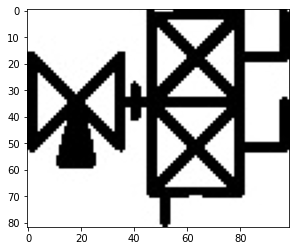

In [41]:
# Data Visualisation
import matplotlib.pyplot as plt

# visualising the first image present in the dataset
plt.imshow(images[0], cmap='gray')

In [42]:
# get dimensions of image
dimensions = images[0].shape
 
# height, width, number of channels in image
height = images[0].shape[0]
width = images[0].shape[1]
 
print('Image Dimension : ',dimensions)
print('\nImage Height    : ',height)
print('Image Width     : ',width)

Image Dimension :  (82, 99)

Image Height    :  82
Image Width     :  99


<h3> Labels Inspection

In [43]:
# Labels dimensions
print(np.array(labels))

['DB&BPV' 'DB&BPV' 'DB&BPV' ... 'Valve Plug' 'Valve Plug' 'Valve Plug']


In [44]:
# Length of labels
len(np.array(labels))

2432

As mentioned in the beginning we have **2432 labels** as well.

In [45]:
# Linear Algebra
import numpy as np

# Find the unique numbers from the labels
classes = np.unique(labels)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('\nOutput classes : ', classes)

Total number of outputs :  39

Output classes :  ['Arrowhead' 'Arrowhead + Triangle' 'Barred Tee' 'Box' 'Continuity Label'
 'Control' 'Control Valve' 'Control Valve Angle Choke'
 'Control Valve Globe' 'DB&BBV' 'DB&BBV + Valve Check' 'DB&BPV' 'Deluge'
 'ESDV Valve Ball' 'ESDV Valve Butterfly' 'ESDV Valve Slab Gate'
 'Exit to Atmosphere' 'Flange + Triangle' 'Flange Joint'
 'Flange Single T-Shape' 'Injector Point' 'Line Blindspacer' 'Reducer'
 'Rupture Disc' 'Sensor' 'Spectacle Blind' 'Temporary Strainer' 'Triangle'
 'Ultrasonic Flow Meter' 'Valve' 'Valve Angle' 'Valve Ball'
 'Valve Butterfly' 'Valve Check' 'Valve Gate Through Conduit'
 'Valve Globe' 'Valve Plug' 'Valve Slab Gate' 'Vessel']


Likewise, we can see that the labels are strings and the symbols are split into **`39 classes`**. 

<center><div class="alert alert-info" style="margin: 20px">These numbers already give us some insights into how successful our import was and the exact size of our data. At first sight, everything has been executed the way we expected it to, and we see that the size of the array is considerable if we take into account that we’re dealing with arrays within arrays.

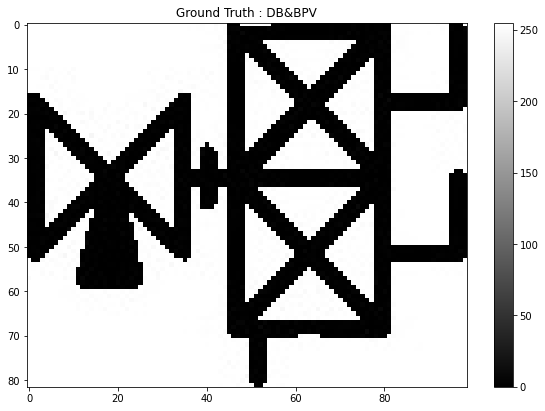

In [46]:
# Setting the figure size
plt.figure(figsize=[10, 6.7])

# Display the first image of the dataset
plt.imshow(images[0], cmap='gray')
plt.title("Ground Truth : {}".format(labels[0]))
plt.colorbar()
plt.grid(False)
plt.show()

**Note** : We indeed have to specify the color map or cmap and set it to "gray" to plot the images in grayscale. That is because imshow() by default uses, by default, a heatmap-like color map.

<div class="alert alert-success">If we inspect the first image in the symbol dataset, we will see that the pixel values fall in the range of 0 to 255. We have to scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so,we will divide the values by 255.
<br><br>
Moreover, the color in the pictures matters less when we’re trying to answer a classification question and as we can see from the picture above that it has multiple colors. Hence, in data preprocessing step we will convert the images to grayscale.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

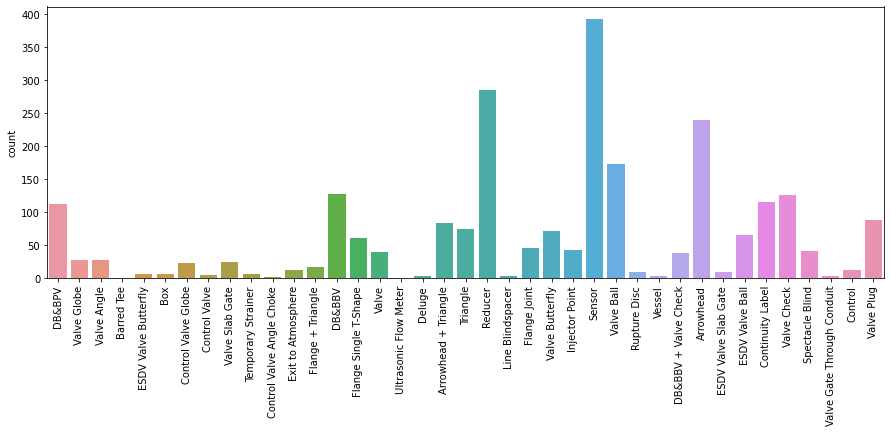

In [47]:
# Data Visualisation
import seaborn as sns

# Setting the figure size
plt.figure(figsize=[15, 5])

# Coverting list of labels into a series
label_count = pd.Series(labels)

# Plotting a countplot of the labels
sns.countplot(label_count)

# Rotating the names to 90 degree for better visualisation
plt.xticks(rotation=90)

We clearly see that not all types of symbols are equally represented in the dataset. **This dataset has a high degree of imbalance.** This is something that we’ll deal with later when we’re manipulating the data before we start modeling our neural network.

At first sight, we see that there are labels that are more heavily present in the dataset than others: the labels **Reducer**, **Sensor** and **Arrowhead** definitely jump out. At this point, it’s nice to keep this in mind, but we’ll definitely go further into this in the next section!

- <h3> Visualizing Symbols

The previous, small analyses or checks have already given us some idea of the data that we’re working with, but when our data mostly consists of images, the step that we should take to explore our data is by visualizing it.

Let’s check out some random symbols: 

- W’re going to make a list with **4 random numbers**. These will be used to select symbols from the images array that we have just inspected in the previous section. In this case, we go for 30, 840, 1640 and 2400.


- Next, we’ll say that for every element in the length of that list, so from 0 to 4, we’re going to create subplots without axes (so that they don’t go running with all the attention and our focus is solely on the images!). In these subplots, we’re going to show a specific image from the images array that is in accordance with the number at the index i. In the first loop, we’ll pass 30 to images[], in the second round 840, and so on. Lastly, we’ll adjust the subplots so that there’s enough width in between them.


- The last thing that remains is to show our plot with the help of the show() function!

There we go:

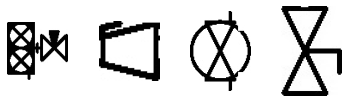

In [48]:
# Determine the (random) indexes of the images that we want to see 
symbols = [300, 840, 1640, 2400]

# Fill out the subplots with the random images that we defined 
for i in range(len(symbols)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[symbols[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)

plt.show()

As we guessed by the 39 labels that are included in this dataset, the symbols are different from each other.

<div class="alert alert-success"> Moreover, these four images are not of the same size! We can obviously toy around with the numbers that are contained in the symbols list and follow up more thoroughly on this observation, but be as it may, this is an important observation which we will need to take into account when we start working more towards manipulating our data so that we can feed it to the neural network.

Let’s confirm the hypothesis of the differing sizes by printing the `shape`, the `minimum` and `maximum` values of the specific images that we have included into the subplots.

The code below heavily resembles the one that we used to create the above plot, but differs in the fact that here, we’ll `alternate sizes and images` instead of plotting just the images next to each other:

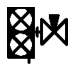

shape: (78, 83), min: 0, max: 255


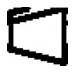

shape: (37, 38), min: 0, max: 255


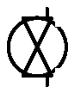

shape: (93, 71), min: 0, max: 255


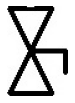

shape: (72, 49, 3), min: 0, max: 255


In [49]:
# Determine the (random) indexes of the images that we want to see 
symbols = [300, 840, 1640, 2400]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(symbols)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[symbols[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[symbols[i]].shape, 
                                                  images[symbols[i]].min(), 
                                                  images[symbols[i]].max()))

**Note:** how we used the format() method on the string "shape: {0}, min: {1}, max: {2}" to fill out the arguments {0}, {1}, and {2} that we defined.

Now that we have seen loose images, we might also want to revisit the countplot that we printed out in the first steps of our data exploration; we can easily do this by plotting an overview of all the 39 classes and one image that belongs to each class:

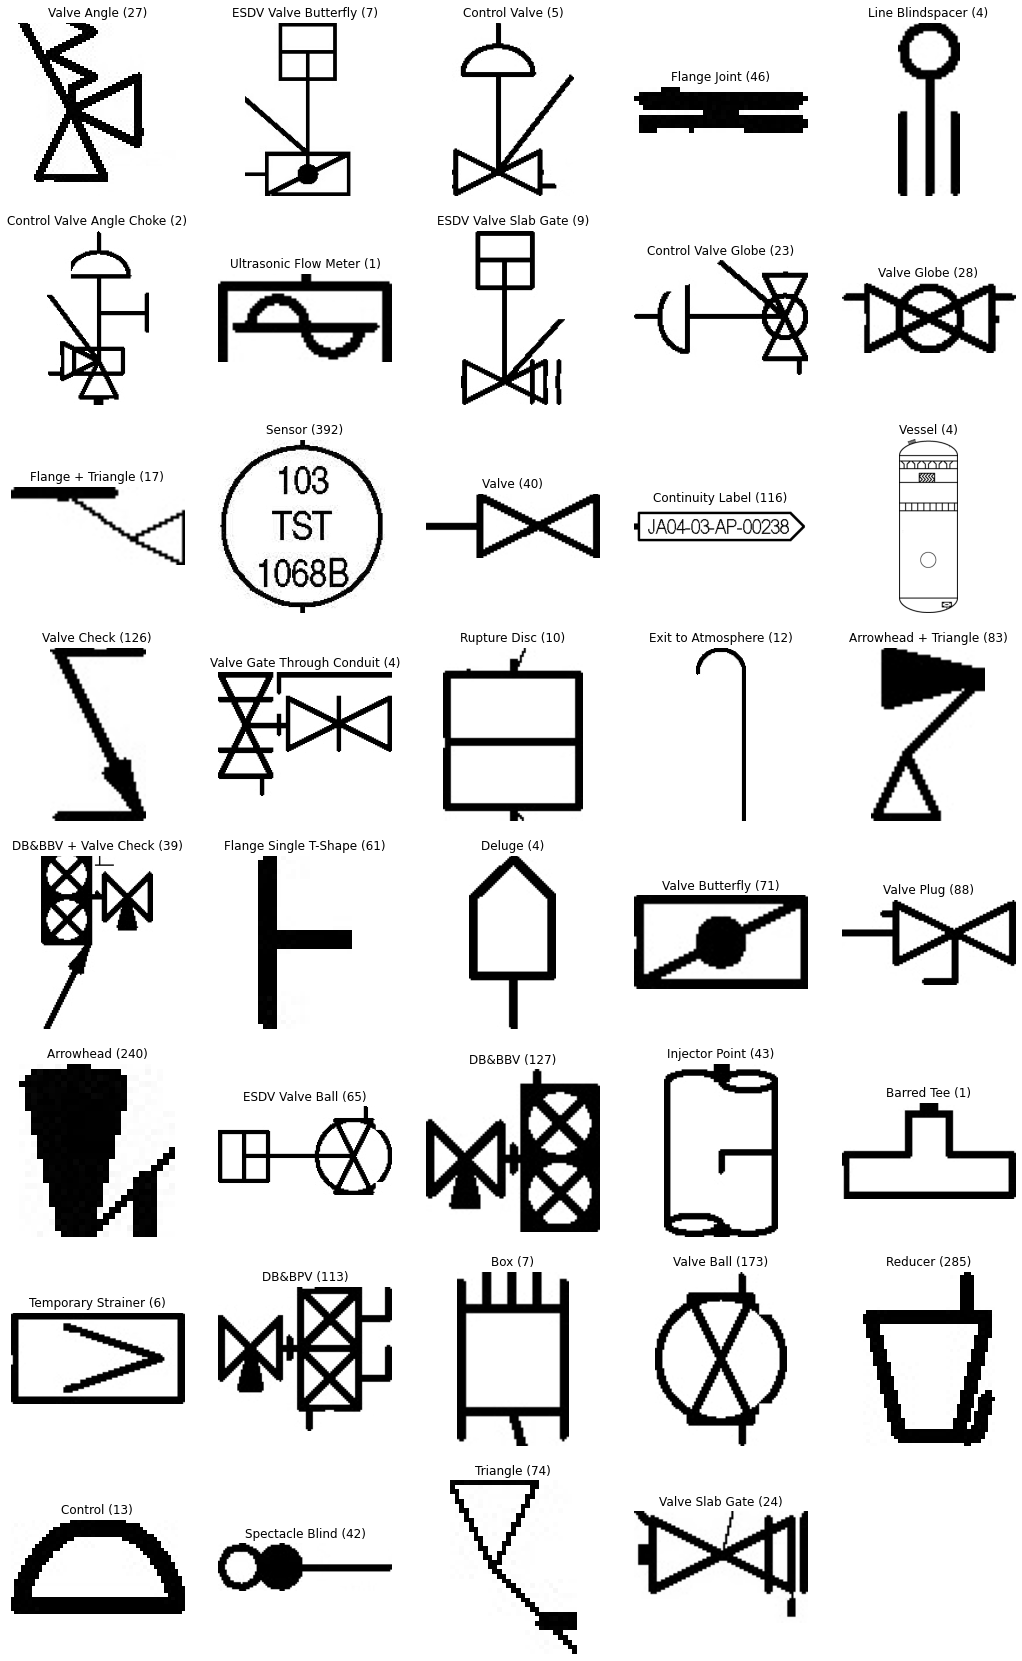

In [50]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(18, 30))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    
    # You pick the first image for each label
    image = images[labels.index(label)]
    
    # Define 39 subplots 
    plt.subplot(8, 5, i)
    
    # Don't include axes
    plt.axis('off')
    
    # Add a title to each subplot 
    plt.title("{0} ({1})".format(label, labels.count(label)))
    
    # Add 1 to the counter
    i += 1
    
    # And you plot the first image 
    plt.imshow(image, cmap='gray')
    
# Show the plot
plt.show()

**Note** : We indeed have to specify the color map or cmap and set it to "gray" to plot the images in grayscale. That is because imshow() by default uses, by default, a heatmap-like color map.

As we mostly guessed in the countplot above, there are considerably more symbols with labels **Reducer**, **Sensor** and **Arrowhead**. This hypothesis is now confirmed in this plot: you see that there are `285 instances with label Reducer`, `392 instances with label Sensor` and `240 instances with label Arrowhead`.

One of the most interesting questions that we could ask ourself now is whether there’s a connection between all of these instances. Let’s take a closer look: We see that **there’s not an immediate connection between these three**.

___

<h2> DATA PREPROCESSING

Now that we have thoroughly explored our data, it’s time preprocessing the data! Let’s recap briefly what we discovered to make sure that we don’t forget any steps in the manipulation:

<div class="alert alert-success">
    
- The size of the images was unequal;

- There are 39 labels or target values;
    
- The pixel values fall in the range of 0 to 255.    
    
- The distribution of the symbol values is pretty unequal; There wasn’t really any connection between the symbols that were heavily present in the dataset.

Now that we have a clear idea of what we need to improve, we can start with manipulating our data in such a way that it’s ready to be fed to the neural network or whichever model we want to feed it to. 
Let’s start first with extracting some features:

- We’ll rescale the images, and 
- We’ll convert the images that are held in the images array to grayscale
- We’ll rescale the pixel values in range 0 - 1
- We’ll convert the class labels into a one-hot encoding vector

We’ll do this color conversion mainly because the color matters less in classification questions like the one we’re trying to answer now. For detection, however, the color does play a big part! So in those cases, it’s not needed to do that conversion!

- <h3> Rescaling Images

To tackle the differing image sizes, we’re going to rescale the images; we can easily do this with the help of the skimage or Scikit-Image library, which is a collection of algorithms for image processing.

In this case, the transform module will come in handy, as it offers us a resize() function; we’ll see that we make use of list comprehension (again!) to **resize each image to 28 by 28 pixels**. Once again, we see that the way we actually form the list: for every image that we find in the images array, we’ll perform the transformation operation that we borrow from the skimage library. Finally, we store the result in the images28 variable:

In [51]:
# Image Processing
from skimage import transform

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28, 3)) for image in images]

<div class="alert alert-success"> Note : The images are now four-dimensional: if we convert images28 to an array and if we concatenate the attribute shape to it, we’ll see that the printout tells us that images28’s dimensions are (28, 28, 3).

We can check the result of the rescaling operation by re-using the code that we used above to plot the 4 random images with the help of the symbols variable. Just don’t forget to change all references to images to images28.

Check out the result here:

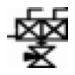

shape: (28, 28, 3), min: 0.0, max: 0.9921568627450981


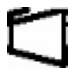

shape: (28, 28, 3), min: 0.0, max: 1.0


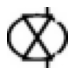

shape: (28, 28, 3), min: 0.0, max: 1.0


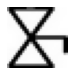

shape: (28, 28, 3), min: 0.0, max: 1.0


In [52]:
# Determine the (random) indexes of the images
symbols = [30, 840, 1640, 2400]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(symbols)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[symbols[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[symbols[i]].shape, 
                                                  images28[symbols[i]].min(), 
                                                  images28[symbols[i]].max()))

<div class="alert alert-success">Note: Because we rescaled, our min and max values have also changed; They seem to be all in the same ranges now, which is really great because then we don’t necessarily need to normalize our data!

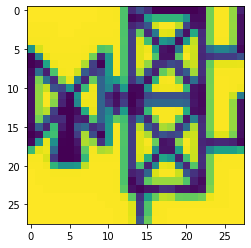

In [73]:
plt.imshow(images28[0])

In [53]:
# get dimensions of image
dimensions = images28[0].shape

# height, width, number of channels in image
height = images28[0].shape[0]
width = images28[0].shape[1]
channels = images28[0].shape[2]
 
print('Image Dimension     : ',dimensions)
print('Image Height        : ',height)
print('Image Width         : ',width)
print('Number of Channels  : ',channels)

Image Dimension     :  (28, 28, 3)
Image Height        :  28
Image Width         :  28
Number of Channels  :  3


<center>Images are usually represented as Height x Width x #Channels where #Channels is 3 for RGB images and 1 for grayscale images in deep learning. 

- <h3> Image Conversion to Grayscale

As said in the introduction to this section of the tutorial, the color in the pictures matters less when we’re trying to answer a classification question. That’s why we’ll also go through the trouble of converting the images to grayscale.

Note, however, that we can also test out on our own what would happen to the final results of our model if we don’t follow through with this specific step. We can check the result of the rescaling operation by re-using the code that we used above to plot the 4 random images with the help of the symbols variable. Just don’t forget to change all references to images to images28. Just like with the rescaling, we can again count on the Scikit-Image library to help us out; In this case, it’s the color module with its rgb2gray() function that we need to use to get where we need to be.

That’s going to be nice and easy!
However, we should not forget to convert the images28 variable back to an array, as the rgb2gray() function does expect an array as an argument.

In [54]:
# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

Double check the result of our grayscale conversion by plotting some of the images; Here, we can again re-use and slightly adapt some of the code to show the adjusted images:

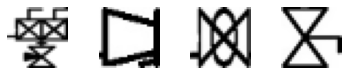

In [81]:
# Determine the (random) indexes of the images that we want to see 
symbols = [30, 848, 140, 2400]

# Fill out the subplots with the random images that we defined 
for i in range(len(symbols)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[symbols[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)

plt.show()

**Note** : We indeed have to specify the color map or cmap and set it to "gray" to plot the images in grayscale. That is because imshow() by default uses, by default, a heatmap-like color map.

- <h3>  One-Hot Encoding Vector

In one-hot encoding, we convert the **categorical data into a vector of numbers**. The reason why we convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. We generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For our problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 39. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, if the image has a label of 9 and it has a total of 10 classes, so for all the images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 1 0].

So let's convert the labels into one-hot encoding vectors:

- This would first require an integer encoding, such as 1, 2, 3. This would be followed by a one hot encoding of integers to a binary vector with 39 values, such as [1, 0, 0].

- The sequence provides at least one example of every possible value in the sequence. Therefore we can use automatic methods to define the mapping of labels to integers and integers to binary vectors.

- We will use the encoders from the scikit-learn library. Specifically, the LabelEncoder for creating an integer encoding of labels and the OneHotEncoder for creating a one hot encoding of integer encoded values.

In [87]:
# convert labels into arrays
values = np.array(labels)
print('values: ',values,'\n')

# integer encode
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(values)
print('integer_encoded: ',integer_encoded_labels,'\n')

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoded_labels = onehot_encoder.fit_transform(integer_encoded_labels)
print(onehot_encoded_labels)

values:  ['DB&BPV' 'DB&BPV' 'DB&BPV' ... 'Valve Plug' 'Valve Plug' 'Valve Plug'] 

integer_encoded:  [11 11 11 ... 36 36 36] 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


<center> Running the above code first prints the sequence of labels. This is followed by the integer encoding of the labels and finally the one hot encoding.

- <h3>  Splitting the Data

In machine learning or any data specific task, we should partition the data correctly. For the model to generalize well, we split the data into two parts, one designed for training and another one for validation. Since we do not have any testing data available. In this case, we will train the model on **60% of the training data** and **validate it on 20%** of the training data and test that model on the remaining **20% data**. This will also help to reduce overfitting since we will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance and atlast we'll test the model on testing data:

In [88]:
X = images28 # Array of images   
y = onehot_encoded_labels # One hot encoded labels  # target variable

In [91]:
# Importing required library to split the dataset
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training data 20% testing data

# Further splitting the data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 80% training datast 20% validation dataset

In [92]:
print('Shape of training dataset  :', X_train.shape, y_train.shape)
print('Shape of validation dataset:', X_test.shape, y_test.shape)
print('Shape of testing dataset   :', X_valid.shape, y_valid.shape)

Shape of training dataset  : (1458, 28, 28) (1458, 39)
Shape of validation dataset: (487, 28, 28) (487, 39)
Shape of testing dataset   : (487, 28, 28) (487, 39)


To be able to use the dataset in Keras API, we need **4-dims numpy arrays**. However, as we see above, our array is 3-dims.

In [94]:
# Reshaping training dataset
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

# Reshaping validation dataset
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))

# Reshaping testing dataset
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [95]:
print('New Shape of training dataset  :', X_train.shape)
print('New Shape of validation dataset:', X_test.shape)
print('New Shape of testing dataset   :', X_valid.shape)

New Shape of training dataset  : (1458, 28, 28, 1)
New Shape of validation dataset: (487, 28, 28, 1)
New Shape of testing dataset   : (487, 28, 28, 1)


___

<H2> BUILDING THE CONVOLUTIONAL NEURAL NETWORK

You might have already heard of *`image or facial recognition or self-driving cars`*. These are real-life implementations of **Convolutional Neural Networks (CNNs)**. In this session, you will learn and understand how to implement these deep, feed-forward artificial neural networks in Keras and also learn how to overcome overfitting with the regularization technique called "dropout".

- <h3> CNN: Introduction

By now, you might already know about machine learning and deep learning, a computer science branch that studies the design of algorithms that can learn. **Deep learning is a subfield of machine learning that is inspired by artificial neural networks, which in turn are inspired by biological neural networks.**

A specific kind of such a deep neural network is the **convolutional network**, which is commonly referred to as CNN or ConvNet. **It's a deep, feed-forward artificial neural network**. Remember that feed-forward neural networks are also called multi-layer perceptrons(MLPs), which are the quintessential deep learning models. The models are called "feed-forward" because information flows right through the model. There are no feedback connections in which outputs of the model are fed back into itself.

**CNNs specifically are inspired by the biological visual cortex.** The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962. In this experiment, the researchers showed that some individual neurons in the brain activated or fired only in the presence of edges of a particular orientation like vertical or horizontal edges. For example, some neurons fired when exposed to vertical sides and some when shown a horizontal edge. Hubel and Wiesel found that all of these neurons were well ordered in a columnar fashion and that together they were able to produce visual perception. This idea of specialized components inside of a system having specific tasks is one that machines use as well and one that you can also find back in CNNs.

Convolutional neural networks have been one of the most influential innovations in the field of computer vision. They have performed a lot better than traditional computer vision and have produced state-of-the-art results. These neural networks have proven to be successful in many different real-life case studies and applications, like:

- `Image classification`, `object detection`, `segmentation`, `face recognition`;
- `Self driving cars` that leverage CNN based vision systems;
- `Classification of crystal structure` using a convolutional neural network;
- And many more, of course!

Alright, you know that you'll be working with feed-forward networks that are inspired by the biological visual cortex, but what does that actually mean?

<center>Take a look at the picture below:

![](Typical_cnn_kecdep.png)

<br> <center> *The image shows you that you feed an image as an input to the network, which goes through `multiple convolutions`, `subsampling`, `a fully connected layer` and finally `outputs` something.*

But what are all these concepts?

1. The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. Each computation leads to extraction of a feature map from the input image. In other words, imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window or kernel around the image. At each position of that matrix, you multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. As a result, you'll get a single number that represents all the values in that window of the images. You use this layer to filtering: as the window moves over the image, you check for patterns in that section of the image. This works because of filters, which are multiplied by the values outputted by the convolution.


2. The objective of subsampling is to get an input representation by reducing its dimensions, which helps in reducing overfitting. One of the techniques of subsampling is max pooling. With this technique, you select the highest pixel value from a region depending on its size. In other words, max pooling takes the largest value from the window of the image currently covered by the kernel. For example, you can have a max-pooling layer of size 2 x 2 will select the maximum pixel intensity value from 2 x 2 region. You're right to think that the pooling layer then works a lot like the convolution layer! You also take a kernel or a window and move it over the image; The only difference is the function that is applied to the kernel and the image window isn't linear.

![](max-pooling_tkk5n2.png)

3. The objective of the fully connected layer is to flatten the high-level features that are learned by convolutional layers and combining all the features. It passes the flattened output to the output layer where you use a softmax classifier or a sigmoid to predict the input class label.



For more information, you can go here: https://cs231n.github.io/convolutional-networks/

<h2> The Network

The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:
- **The first layer will have 32-3 x 3 filters**,
- **The second layer will have 64-3 x 3 filters** and
- **The third layer will have 128-3 x 3 filters**.

In addition, there are three max-pooling layers each of size 2 x 2.

![](fashion-mnist-architecture_htbpsz.png)
<center> Figure: Architecture of the Model

<h2> Model the Data

First, let's import all the necessary modules required to train the model.

In [62]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

<h2> Neural Network Architecture

In Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here:
- You'll first add a first convolutional layer with **Conv2D()**. Note that you use this function because you're working with images! 


- Next, you add the **Leaky ReLU activation function** which helps the network learn non-linear decision boundaries. Since you have 39 different classes, you'll need a non-linear decision boundary that could separate these 39 classes which are not linearly separable. More specifically, you add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.


- Next, you'll add the max-pooling layer with **MaxPooling2D()** and so on.


- The last layer is a **Dense layer** that has a `softmax activation function` with 39 units, which is needed for this multi-class classification problem.

In [96]:
# Creating a Sequential Model and adding the layers
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2))) # down-sample an input representation
model.add(Dropout(0.25)) # ignoring neurons during the training phase of certain set of neurons chosen at random

# 2nd conv
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd conv
model.add(Conv2D(128, (3, 3),padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten()) # converting the data into a 1-dimensional array for inputting it to the next layer

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(39, activation='softmax'))

<h2> Compile the Model

After the model is created, you compile it using the **Adam optimizer**, one of the most popular **`optimization`** algorithms. Additionally, you specify the **`loss`** type which is **categorical cross entropy** which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the **`metrics`** as **accuracy** which you want to analyze while the model is training.

These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. The cross-entropy function, through its logarithm, allows the network to asses such small errors and work to eliminate them. Say, the desired output value is 1, but what you currently have is 0.000001.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function. Adam is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [97]:
model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

Let's visualize the layers that you created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)         

<h2> Train the Model

It's finally time to train the model with Keras' fit() function! The model trains for 20 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

In [99]:
model_train = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1458 samples, validate on 487 samples
Epoch 1/10
1458/1458 [==============================] - 13s 9ms/step - loss: 3.1149 - accuracy: 0.1914 - val_loss: 2.7229 - val_accuracy: 0.3655
Epoch 2/10
1458/1458 [==============================] - 7s 5ms/step - loss: 2.3476 - accuracy: 0.4122 - val_loss: 1.7572 - val_accuracy: 0.5133
Epoch 3/10
1458/1458 [==============================] - 7s 5ms/step - loss: 1.5988 - accuracy: 0.5919 - val_loss: 1.1723 - val_accuracy: 0.6961
Epoch 4/10
1458/1458 [==============================] - 6s 4ms/step - loss: 1.1829 - accuracy: 0.6920 - val_loss: 0.8040 - val_accuracy: 0.7926
Epoch 5/10
1458/1458 [==============================] - 6s 4ms/step - loss: 0.9380 - accuracy: 0.7503 - val_loss: 0.6581 - val_accuracy: 0.8378
Epoch 6/10
1458/1458 [==============================] - 6s 4ms/step - loss: 0.7274 - accuracy: 0.8025 - val_loss: 0.4470 - val_accuracy: 0.8994
Epoch 7/10
1458/1458 [==============================] - 6s 4ms/step - loss: 0.6000 - acc

Finally! You trained the model for 10 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 10 epochs the **training accuracy is 91%** and the training loss is quite low.

Let's evaluate the performance of your model on the test set before you come on to a conclusion.

<h2> Model Evaluation on the Test Set

In [67]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [68]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22901963722534494
Test accuracy: 0.9425051212310791


The test accuracy looks impressive. It turns out that your classifier does better than the benchmark that was reported here.

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

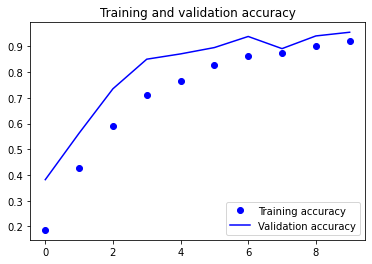

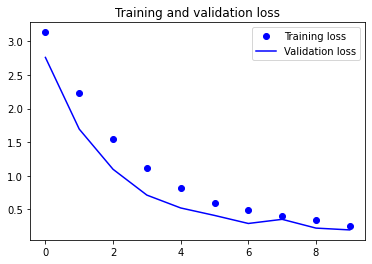

In [69]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Let's save the model so that you can directly load it and not have to train it again for 10 epochs. This way, you can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves you time. Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.

In [70]:
model.save("model_CNN.h5py")

<h1> <center> END